In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale
from astropy.wcs import wcs
from glob import glob

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True) 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [2]:
gsd_cat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat', format='ascii').to_pandas()
gnd_cat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat', format='ascii').to_pandas()

In [81]:
GS_flist = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/GS5/*/Prep/*full.fits')

In [82]:
GS_ids = []

for i in range(len(GS_flist)):
    glist = fits.open(GS_flist[i])[0].header['GRIS*']
    if 'G102' in [glist[U] for U in range(len(glist))]:
        GS_ids.append(int(os.path.basename(GS_flist[i]).split('.')[0].split('_')[1]))

In [47]:
seg = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')
f160 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')
f125 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')
f105 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')

In [83]:
ra,dec = [[],[]]
kr,fr = [[],[]]
for i in GS_ids:
    ra.append(gsd_cat.query('id == {0}'.format(i)).ra.values[0] )
    dec.append(gsd_cat.query('id == {0}'.format(i)).dec.values[0] )    
    kr.append(gsd_cat.query('id == {0}'.format(i)).kron_radius.values[0])
    fr.append(gsd_cat.query('id == {0}'.format(i)).flux_radius.values[0])    

In [84]:
GS_DF = pd.DataFrame({'ids':GS_ids, 'ra' : ra, 'dec' : dec, 'kr':kr, 'fr':fr})

In [85]:
w = wcs.WCS(f125[0].header)

pos = w.wcs_world2pix(np.array([GS_DF.ra,GS_DF.dec]).T, 1)

In [91]:
sflts = glob('/Users/Vince.ec/Clear_data/s_flt_files/*')

In [94]:
dat = fits.open(sflts[0])

In [96]:
dat[0].header['TARGNAME']

'GS2'

In [97]:
def flt_pos(fn):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    pos=w.wcs_pix2world([[0,0],[xpixlim, 0],[xpixlim, ypixlim],[0, ypixlim]],1)
            
    return pos

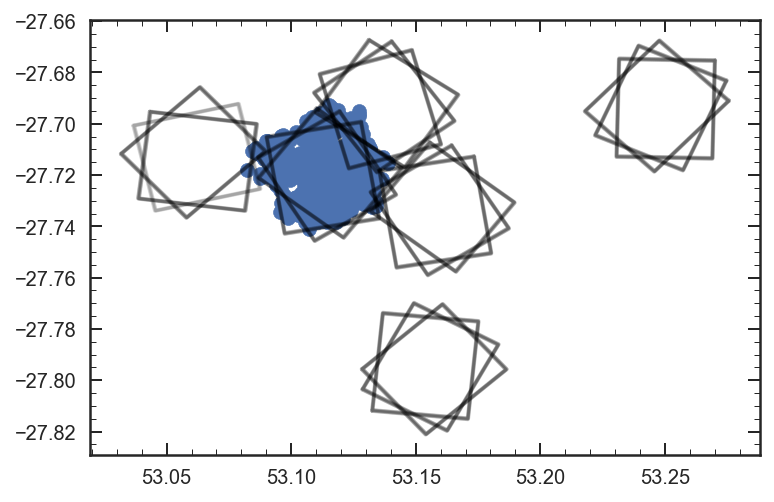

In [98]:
plt.scatter(GS_DF.ra,GS_DF.dec)

for i in sflts:
    p1,p2,p3,p4 = flt_pos(i)
    allpos = np.array([p1,p2,p3,p4,p1]).T
    plt.plot(allpos[0],allpos[1], 'k',alpha = 0.1,zorder=1)

In [87]:
xlims = np.array([min(pos.T[0]) - 20, max(pos.T[0]) + 20]).astype(int)
ylims = np.array([min(pos.T[1])- 20, max(pos.T[1])+ 20]).astype(int) 

In [88]:
f105img = f105[0].data[ylims[0]:ylims[1],xlims[0]:xlims[1]]
f125img = f125[0].data[ylims[0]:ylims[1],xlims[0]:xlims[1]]
f160img = f160[0].data[ylims[0]:ylims[1],xlims[0]:xlims[1]]

In [89]:
img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

img_scale : asinh
img_scale : asinh
img_scale : asinh


Text(0.5,1,'Blue = F105W, Green = F125W, Red = F160W')

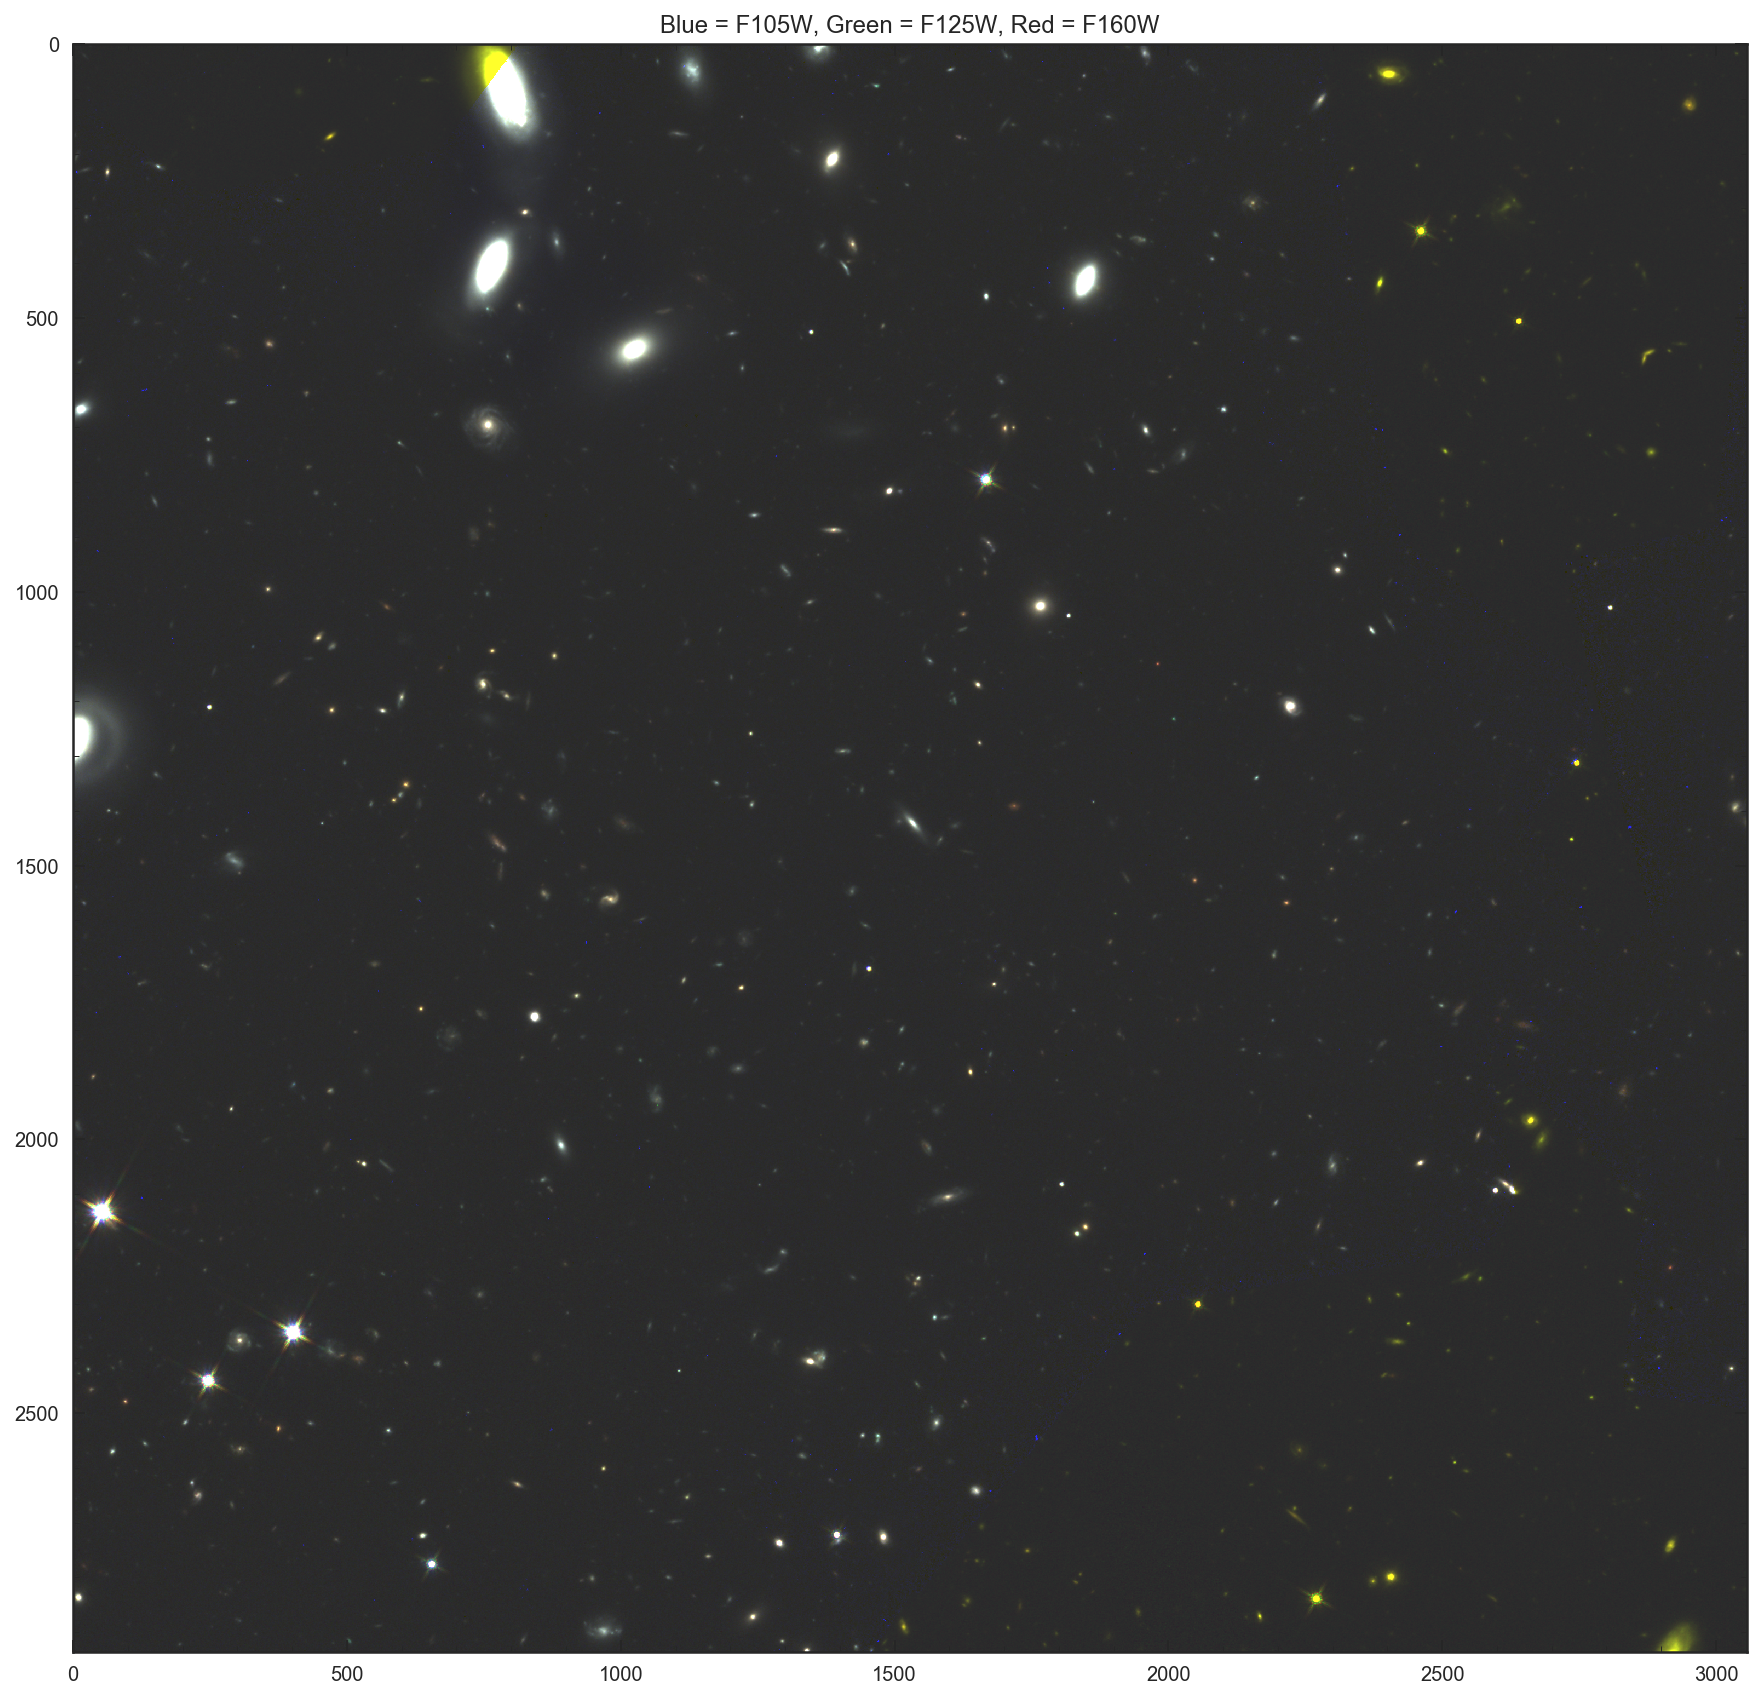

In [90]:
fig = plt.figure(figsize=[15,15])

plt.imshow(img,aspect='equal')
plt.title('Blue = F105W, Green = F125W, Red = F160W')
# plt.scatter(pos.T[0] - xlims[0], pos.T[1]- ylims[0],marker='o', 
#             s=(72./fig.dpi)**2 * GS_DF.fr.values, facecolors='none',edgecolors='r', linewidth=2)


In [91]:
(72./fig.dpi)**2 * GS2_DF.fr.values

array([24.368, 12.644,  4.944,  5.393,  5.908,  4.104, 20.252,  3.256,
        3.475,  5.146,  3.606,  4.203,  6.681,  4.494,  4.731,  5.301,
        6.841,  3.008,  5.877,  3.848,  3.191,  3.953,  4.236, 10.483,
        5.326,  9.837,  4.47 , 12.636,  8.311,  5.667,  9.258,  7.087,
        6.349,  3.704,  8.828,  6.065,  2.294,  4.025,  5.407,  5.457,
        5.959, 12.067,  4.897,  5.742,  8.131,  8.82 ,  2.283,  3.664,
        3.48 ,  4.048,  5.645,  2.297,  7.679,  5.969,  4.419,  5.669,
        4.347, 12.123,  6.161,  4.324,  9.194,  7.02 , 13.928, 23.469,
        3.174,  3.935,  3.305,  5.303,  4.959,  3.125,  6.758, 10.337,
        5.454,  5.165,  3.675,  4.637,  3.713,  3.625, 12.39 ,  8.425,
        6.699,  5.699,  5.258,  3.732,  4.659,  6.902,  6.758,  6.244,
        5.055,  8.54 ,  3.587,  3.956,  4.206,  4.352,  4.869,  4.229,
        5.251,  4.332,  5.811,  4.953,  4.494,  6.003,  3.322,  4.569,
       11.172,  4.572,  6.087,  4.507,  8.091,  4.743,  4.679,  4.063,
      